# Comparaci√≥n de Algoritmos de Clustering
Este notebook compara KMeans, Clustering Jer√°rquico y DBSCAN sobre un dataset sint√©tico con estructuras complejas (c√≠rculos, lunas y blobs).

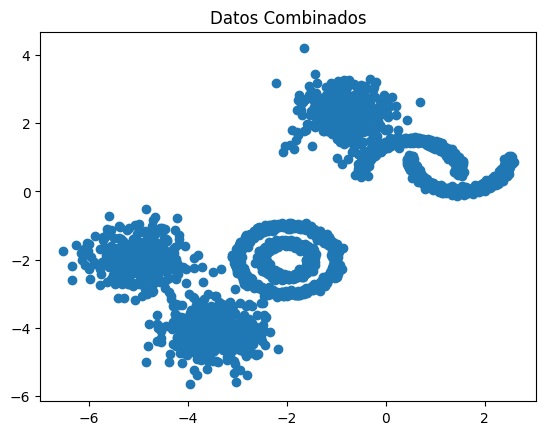

In [1]:

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

# Datos combinados
n_samples = 1000
np.random.seed(0)

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=1)

X, y = noisy_circles
df_X = pd.DataFrame(X, columns=['x', 'y']) - 2
X, y = noisy_moons
df_X = pd.concat([df_X, pd.DataFrame(X, columns=['x', 'y']) + 0.5], ignore_index=True)
X, y = blobs
df_X = pd.concat([df_X, 0.5 * pd.DataFrame(X, columns=['x', 'y'])], ignore_index=True)

X_data = df_X.to_numpy()

plt.scatter(df_X.x, df_X.y)
plt.title("Datos Combinados")
plt.show()


In [2]:

# KMeans
kmeans_model = KMeans(n_clusters=7, random_state=0)
kmeans_labels = kmeans_model.fit_predict(X_data)

# Jer√°rquico
linkage_matrix = linkage(X_data, method='centroid')
hierarchical_labels = fcluster(linkage_matrix, t=1.1, criterion='distance')

# DBSCAN
dbscan_model = DBSCAN(eps=0.2, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(X_data)


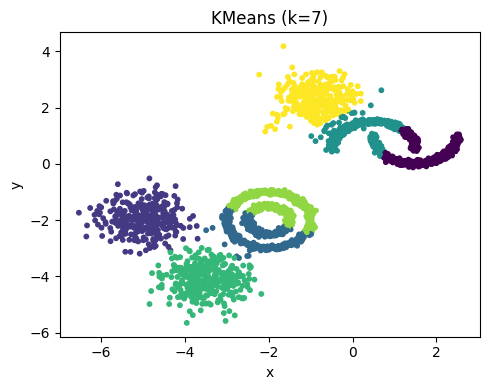

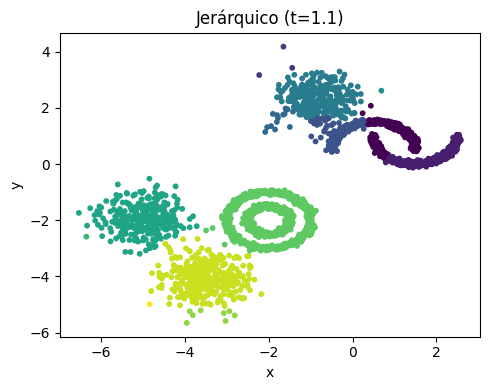

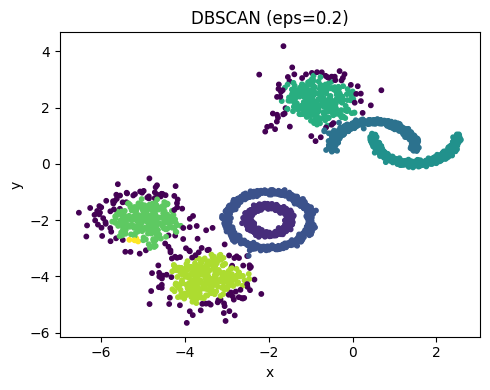

In [3]:

def plot_clusters(X, labels, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    plt.show()

plot_clusters(X_data, kmeans_labels, "KMeans (k=7)")
plot_clusters(X_data, hierarchical_labels, "Jer√°rquico (t=1.1)")
plot_clusters(X_data, dbscan_labels, "DBSCAN (eps=0.2)")


In [4]:

# C√°lculo de m√©tricas
kmeans_results = {
    "Silhouette": silhouette_score(X_data, kmeans_labels),
    "Calinski-Harabasz": calinski_harabasz_score(X_data, kmeans_labels),
    "Inertia": kmeans_model.inertia_
}

hierarchical_results = {
    "Silhouette": silhouette_score(X_data, hierarchical_labels),
    "Calinski-Harabasz": calinski_harabasz_score(X_data, hierarchical_labels),
    "Inertia": None
}

if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    dbscan_results = {
        "Silhouette": silhouette_score(X_data, dbscan_labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_data, dbscan_labels),
        "Inertia": None
    }
else:
    dbscan_results = {
        "Silhouette": float('nan'),
        "Calinski-Harabasz": float('nan'),
        "Inertia": None
    }

# Consolidaci√≥n
results_df = pd.DataFrame({
    "KMeans": kmeans_results,
    "Jer√°rquico": hierarchical_results,
    "DBSCAN": dbscan_results
})

results_df


KMeans   Jer√°rquico       DBSCAN
Silhouette            0.460645     0.434621     0.211670
Calinski-Harabasz  9247.611135  4348.231151  2207.767362
Inertia            1282.396922          NaN          NaN

¬øQu√© pasa en nuestro caso?

| Algoritmo      | Forma esperada | Se adapta a la forma real | Resultado visual | M√©tricas |
| -------------- | -------------- | ------------------------- | ---------------- | -------- |
| **KMeans**     | Esferas        | ‚ùå (fuerza la forma)       | Artificial       | ‚úÖ Alta   |
| **Jer√°rquico** | General        | ‚úÖ Parcialmente            | Intermedia       | üü° Media |
| **DBSCAN**     | Arbitraria     | ‚úÖ Excelente               | Natural y clara  | ‚ùå Baja   |



*   KMeans tiene mejores m√©tricas porque se ajusta muy bien a los blobs (formas circulares), pero divide mal las lunas y c√≠rculos.

*   DBSCAN identifica perfectamente los c√≠rculos y lunas y detecta el ruido, pero sus m√©tricas bajan porque:

        * No todos los puntos quedan asignados (hay ruido).
        * Algunos cl√∫steres tienen formas no compactas, lo que penaliza las m√©tricas cl√°sicas.


## Conclusi√≥n

- **KMeans** tiene mejores m√©tricas (Silhouette: 0.46, Calinski: 9254), pero asume clusters esf√©ricos, lo cual limita su utilidad con datos complejos.
- **Jer√°rquico** muestra resultados intermedios.
- **DBSCAN** detecta ruido y forma mejor clusters con estructuras arbitrarias, a pesar de m√©tricas m√°s bajas.

üìå **Recomendaci√≥n**: Para este dataset no lineal, **DBSCAN** es el m√°s adecuado visualmente, a pesar de tener m√©tricas m√°s bajas.


Elegir un buen algoritmo de clustering no es solo una cuesti√≥n de n√∫meros. Es tambi√©n una cuesti√≥n de sentido estructural. A veces, las m√©tricas nos enga√±an si no est√°n alineadas con la forma real de los datos.

El an√°lisis visual, especialmente cuando los datos tienen estructura conocida o interpretable, es una herramienta v√°lida y profesional para evaluar clustering. Las m√©tricas deben apoyar ‚Äîno reemplazar‚Äî al criterio experto.

